In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
%matplotlib inline


Mounted at /content/drive


In [4]:
d = pd.read_csv('/content/drive/MyDrive/spaceship/train.csv')
d.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [22]:
import numpy as np

# replace "?" to NaN
d.replace("?", np.nan, inplace = True)
d.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


dentify_missing_values

Evaluating for Missing Data
The missing values are converted to Python's default. We use Python's built-in functions to identify these missing values. There are two methods to detect missing data:

.isnull()
.notnull()
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.

In [23]:
missing_data = d.isnull()
missing_data.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [24]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

PassengerId
False    8693
Name: PassengerId, dtype: int64

HomePlanet
False    8492
True      201
Name: HomePlanet, dtype: int64

CryoSleep
False    8476
True      217
Name: CryoSleep, dtype: int64

Cabin
False    8494
True      199
Name: Cabin, dtype: int64

Destination
False    8511
True      182
Name: Destination, dtype: int64

Age
False    8514
True      179
Name: Age, dtype: int64

VIP
False    8490
True      203
Name: VIP, dtype: int64

RoomService
False    8512
True      181
Name: RoomService, dtype: int64

FoodCourt
False    8510
True      183
Name: FoodCourt, dtype: int64

ShoppingMall
False    8485
True      208
Name: ShoppingMall, dtype: int64

Spa
False    8510
True      183
Name: Spa, dtype: int64

VRDeck
False    8505
True      188
Name: VRDeck, dtype: int64

Name
False    8493
True      200
Name: Name, dtype: int64

Transported
False    8693
Name: Transported, dtype: int64



Replace "NaN" by mean value in "normalized-losses" column

In [5]:
d.shape

(8693, 14)

In [28]:
avg_norm_loss = d["CryoSleep"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 0.35830580462482303


In [29]:
avg_norm_loss = d["Age"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 28.82793046746535


Replace "NaN" by mean value in "normalized-losses" column

In [31]:
d["CryoSleep"].replace(np.nan, avg_norm_loss, inplace=True)

In [33]:
d["Age"].replace(np.nan, avg_norm_loss, inplace=True)

In [6]:
k = d.isna().sum()
k[k!=0]

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


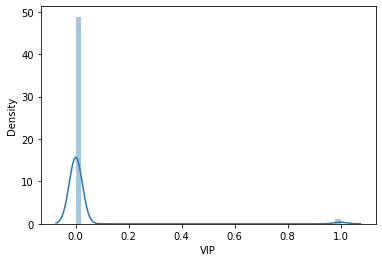

In [8]:
sns.distplot(d['VIP'])

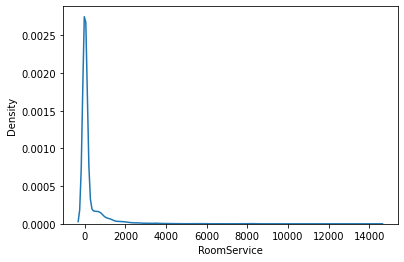

In [10]:
sns.kdeplot(d['RoomService'])

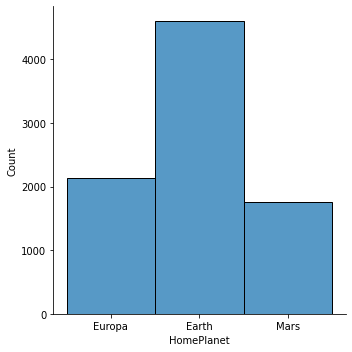

In [12]:
sns.displot(d['HomePlanet'])

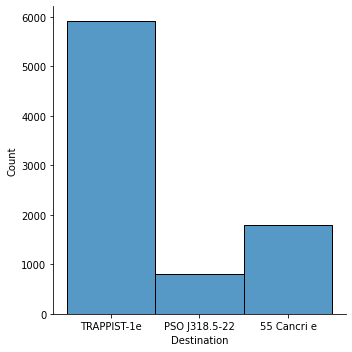

In [18]:
sns.displot(d['Destination'])

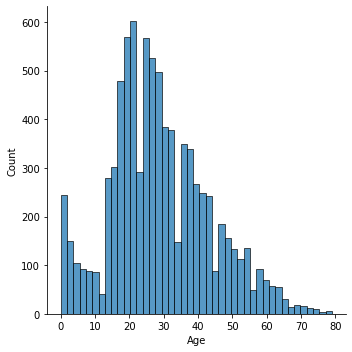

In [19]:
sns.displot(d['Age'])

In [13]:
for c in d.columns:
    print ("%20s"%c, d[c].dtype)

         PassengerId object
          HomePlanet object
           CryoSleep object
               Cabin object
         Destination object
                 Age float64
                 VIP object
         RoomService float64
           FoodCourt float64
        ShoppingMall float64
                 Spa float64
              VRDeck float64
                Name object
         Transported bool


In [14]:
k = d.isna().sum()
k[k!=0]

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64

In [20]:
for column in train.columns.values.tolist():
    print(column)
    print (train[column].value_counts())
    print("")    

NameError: ignored